<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/PID_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
user = "SL"
uzem = "Szint1"
data_source="5"
fname="DW_AX4_PIC03_toNN.csv"

In [5]:
if user=="Anna":
    path = "/content/drive/MyDrive/Egyetem_MSc/Diplomamunka/2022Anna/Data/Abb/Szint1/"
else:
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Szteroid2/április/"

    #Üzemenkénti futtatáshoz:

    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Nor/"
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Sp/"            #Külön kód van rá, legalul
    path = "/content/drive/MyDrive/2022Anna/Datapipeline/"+data_source+"/"+fname
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Szint3/"
    #path = "/content/drive/MyDrive/2022Anna/Data/Abb/Szteroid2/"      #KÉSZ

In [6]:
path

'/content/drive/MyDrive/2022Anna/Datapipeline/5/DW_AX4_PIC03_toNN.csv'

In [7]:
df=pd.read_csv(path,usecols=None)

In [8]:
df.isnull().values.any()

False

In [9]:
df.tail()

,2.2024872303009038,2.2024872303009038.1,2.2024872303009038.2,2.2016098499298096,2.200732469558716,2.199855089187622,2.1989777088165283,2.2024872303009038.3,2.1954681873321533,2.1989777088165283.1,2.1989777088165283.2,2.1989777088165283.3,2.2024872303009038.4,2.1989777088165283.4,2.2024872303009038.5,2.200732469558716.1,2.1989777088165283.5,2.2024872303009038.6,2.200732469558716.2,2.1989777088165283.6
267710,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612
267711,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612
267712,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612
267713,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612
267714,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612,0.112612


In [10]:
df.mean()

2.2024872303009038      2.070781
2.2024872303009038.1    2.070773
2.2024872303009038.2    2.070765
2.2016098499298096      2.070758
2.200732469558716       2.070750
2.199855089187622       2.070742
2.1989777088165283      2.070734
2.2024872303009038.3    2.070726
2.1954681873321533      2.070719
2.1989777088165283.1    2.070711
2.1989777088165283.2    2.070703
2.1989777088165283.3    2.070695
2.2024872303009038.4    2.070687
2.1989777088165283.4    2.070680
2.2024872303009038.5    2.070672
2.200732469558716.1     2.070664
2.1989777088165283.5    2.070656
2.2024872303009038.6    2.070648
2.200732469558716.2     2.070641
2.1989777088165283.6    2.070633
dtype: float64

In [11]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plot

df_ = df

# You must normalize the data before applying the fit method
df_normalized=(df_ - df_.mean()) / df_.std()

In [12]:
df_normalized.describe()

,2.2024872303009038,2.2024872303009038.1,2.2024872303009038.2,2.2016098499298096,2.200732469558716,2.199855089187622,2.1989777088165283,2.2024872303009038.3,2.1954681873321533,2.1989777088165283.1,2.1989777088165283.2,2.1989777088165283.3,2.2024872303009038.4,2.1989777088165283.4,2.2024872303009038.5,2.200732469558716.1,2.1989777088165283.5,2.2024872303009038.6,2.200732469558716.2,2.1989777088165283.6
count,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05,2.677150e+05
mean,1.087120e-16,7.745729e-16,6.115049e-16,4.076700e-17,1.494790e-16,9.512299e-17,6.115049e-16,2.717800e-16,7.338059e-16,4.212590e-16,2.717800e-17,5.027930e-16,3.804920e-16,8.832849e-16,-3.125470e-16,6.658609e-16,-5.707379e-16,-7.881619e-16,-6.794499e-16,-1.494790e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.160477e+00,-4.160341e+00,-4.160206e+00,-4.160071e+00,-4.159935e+00,-4.159800e+00,-4.159665e+00,-4.159529e+00,-4.159394e+00,-4.159259e+00,-4.159123e+00,-4.158988e+00,-4.158853e+00,-4.158718e+00,-4.158582e+00,-4.158447e+00,-4.158312e+00,-4.158177e+00,-4.158041e+00,-4.157906e+00
25%,2.575644e-01,2.575727e-01,2.575809e-01,2.575892e-01,2.575975e-01,2.576057e-01,2.576139e-01,2.576222e-01,2.576304e-01,2.576387e-01,2.576469e-01,2.576552e-01,2.576634e-01,2.576717e-01,2.576799e-01,2.576882e-01,2.576964e-01,2.577047e-01,2.577130e-01,2.577212e-01
50%,2.575644e-01,2.575727e-01,2.575809e-01,2.575892e-01,2.575975e-01,2.576057e-01,2.576139e-01,2.576222e-01,2.576304e-01,2.576387e-01,2.576469e-01,2.576552e-01,2.576634e-01,2.576717e-01,2.576799e-01,2.576882e-01,2.576964e-01,2.577047e-01,2.577130e-01,2.577212e-01
75%,2.646155e-01,2.646236e-01,2.646316e-01,2.646397e-01,2.646477e-01,2.646558e-01,2.646638e-01,2.646719e-01,2.646799e-01,2.646880e-01,2.646960e-01,2.647040e-01,2.647121e-01,2.647201e-01,2.647282e-01,2.647363e-01,2.647443e-01,2.647524e-01,2.647604e-01,2.647684e-01
max,4.954657e-01,4.954671e-01,4.954686e-01,4.954700e-01,4.954714e-01,4.954728e-01,4.954742e-01,4.954756e-01,4.954770e-01,4.954784e-01,4.954798e-01,4.954812e-01,4.954826e-01,4.954840e-01,4.954855e-01,4.954869e-01,4.954883e-01,4.954897e-01,4.954911e-01,4.954925e-01


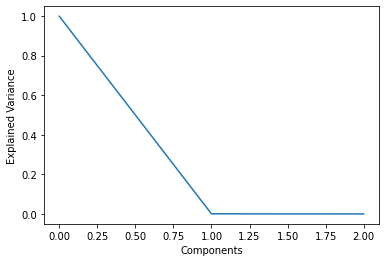

In [47]:


pca = PCA(n_components=3)
data=pca.fit_transform(df_normalized)

pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

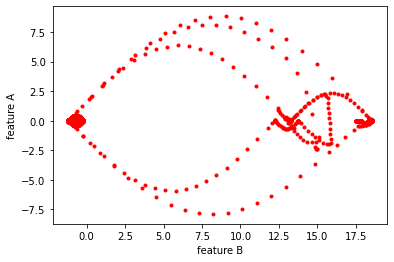

In [21]:
plot.scatter(data[:,0],data[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

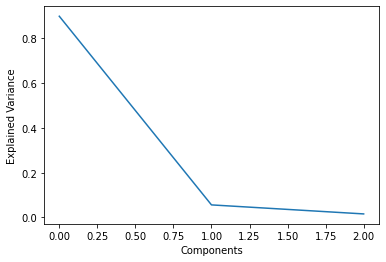

In [35]:
pca = PCA(n_components=3)

data2=pca.fit_transform(df_normalized[:-133000])


pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

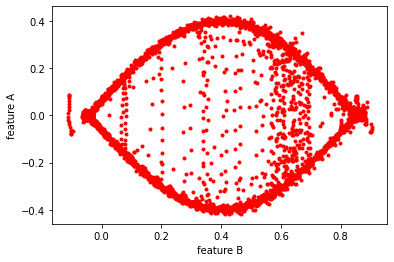

In [36]:
plot.scatter(data2[:,0],data2[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

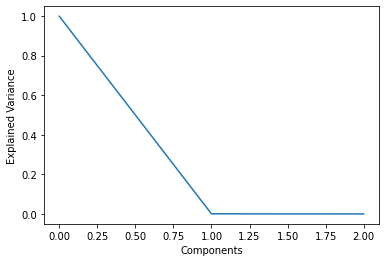

In [53]:
pca = PCA(n_components=3)
data2=pca.fit(df_normalized)
data2=pca.transform(df_normalized[0:-210000])
pca.components_

plot.plot(pca.explained_variance_ratio_)
plot.ylabel('Explained Variance')
plot.xlabel('Components')
plot.show()

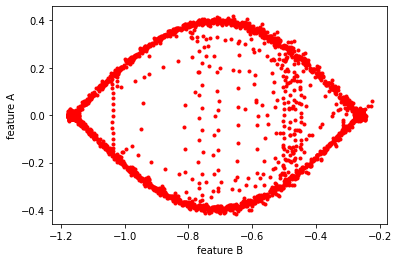

In [54]:
plot.scatter(data2[:,0],data2[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()

In [57]:
data2=pca.transform(df_normalized[-210000:])

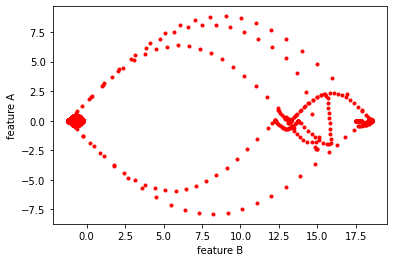

In [58]:
plot.scatter(data2[:,0],data2[:,1],c="r",marker=".")
plot.ylabel('feature A')
plot.xlabel('feature B')
plot.show()